In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

## Check controls: in-vitro array, and naked plasmid

#### This plasmid contains a part of the sequence of the ARS305 locus

In [32]:
wt_rep3_nucarray = np.loadtxt("controls/wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt")
wt_rep3_nucarray.shape

(780, 1966)

In [33]:
#np.gradient(peaks[0]).mean()

Text(0.5, 1.0, 'wt rep nuc array')

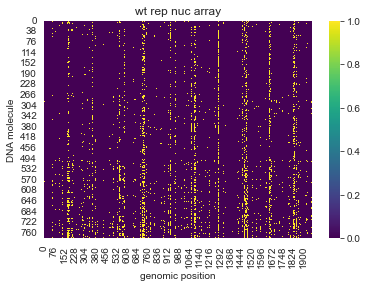

In [34]:
#heatmap of the wt raw data
sns.heatmap(wt_rep3_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep nuc array")

In [35]:
# load the other replicate, and the counts from the mutants:

wt_rep2_nucarray = np.loadtxt("controls/mat_Megalodon_repII_in_vitro_nucl_array.txt")

dies6_rep1_nucarray = np.loadtxt("controls/DIES6_ALL_REP1_in_vitro_nucl_array.txt")
dies6_rep2_nucarray = np.loadtxt("controls/DIES6_REP2_780READS_in_vitro_nucl_array.txt")

disw2_rep1_nucarray = np.genfromtxt("controls/array_disw2_rep1_780READS_noNA.csv",
                                   dtype = int, delimiter = ",")

#disw2_rep2_nucarray = np.genfromtxt("controls/array_disw2_rep2_780READS_noNA.csv",
#                                   dtype = int, delimiter = ",")
#delete the first three columns as they come from linker DNA 
#disw2_rep2_nucarray_trimmed = disw2_rep2_nucarray[:, 30:]
#np.savetxt("controls/array_disw2_rep2_780READS_noNA_cleaned.csv", disw2_rep2_nucarray_trimmed)#

disw2_rep2_nucarray = np.loadtxt("controls/array_disw2_rep2_780READS_noNA_cleaned.csv")

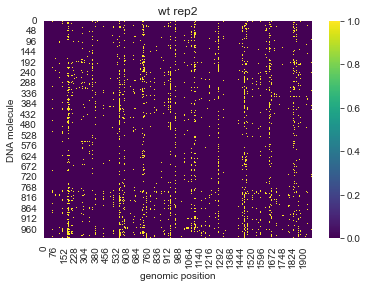

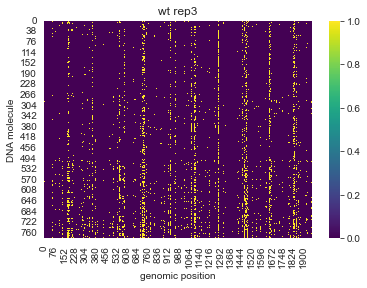

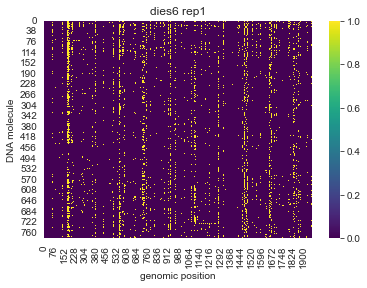

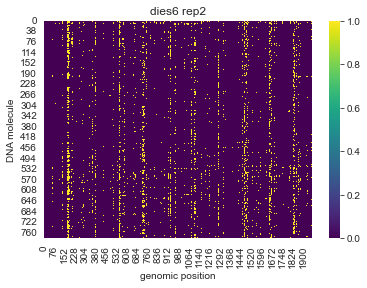

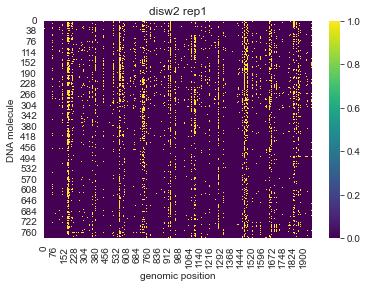

Text(0.5, 1.0, 'disw2 rep2')

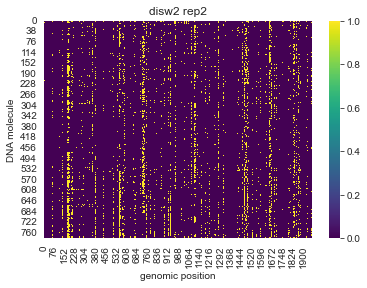

In [36]:
sns.heatmap(wt_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep2")
plt.show()

sns.heatmap(wt_rep3_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep3")
plt.show()

sns.heatmap(dies6_rep1_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("dies6 rep1")
plt.show()

sns.heatmap(dies6_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("dies6 rep2")
plt.show()

sns.heatmap(disw2_rep1_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("disw2 rep1")
plt.show()

sns.heatmap(disw2_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("disw2 rep2")

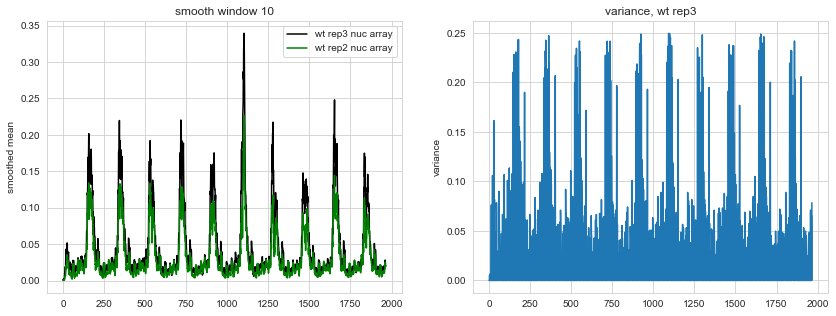

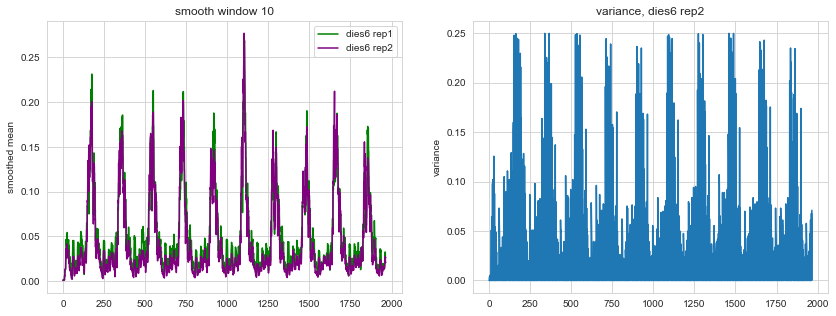

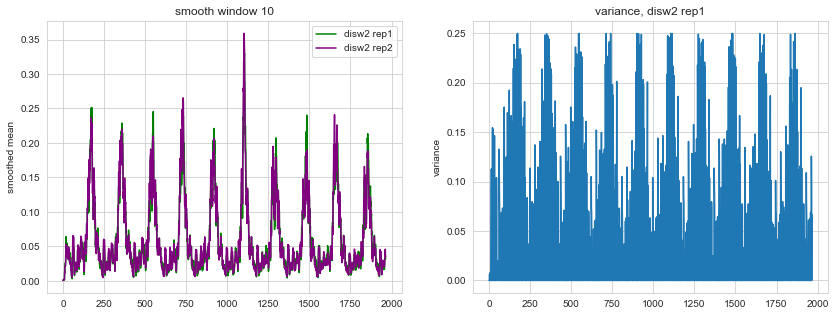

wt:  3.6679572617529154e-102
dies6:  5.234857328878377e-57
disw2:  0.02275886341794949


In [37]:
### compare replicates smoothed mean and varinace of wildtype, dies6 and disw2

smooth = 10

#wildtype
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(wt_rep3_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "black", label = "wt rep3 nuc array", ax = ax1)
sns.lineplot(x = range(wt_rep2_nucarray.shape[1]), 
                 y = np.convolve(wt_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "wt rep2 nuc array", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = wt_rep3_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, wt rep3")
plt.show()

#DIES6
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(dies6_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "dies6 rep1", ax = ax1)
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(dies6_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "dies6 rep2", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = dies6_rep2_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, dies6 rep2")
plt.show()

#DISW2
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(disw2_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "disw2 rep1", ax = ax1)
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(disw2_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "disw2 rep2", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = disw2_rep1_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, disw2 rep1")
plt.show()

print("wt: ", wilcoxon(wt_rep3_nucarray.mean(axis = 0), wt_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)
print("dies6: ", wilcoxon(dies6_rep1_nucarray.mean(axis = 0), dies6_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)
print("disw2: ", wilcoxon(disw2_rep1_nucarray.mean(axis = 0), disw2_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)

In [38]:
wt_rep3_smooth_mean = np.convolve(wt_rep3_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
wt_rep2_smooth_mean = np.convolve(wt_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
dies6_rep1_smooth_mean = np.convolve(dies6_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
dies6_rep2_smooth_mean = np.convolve(dies6_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_nucarray = np.concatenate((wt_rep3_smooth_mean.reshape(1, 1966),
                                 wt_rep2_smooth_mean.reshape(1, 1966),
                              dies6_rep1_smooth_mean.reshape(1, 1966),
                              dies6_rep2_smooth_mean.reshape(1, 1966)),
                              axis = 0)

w, p = wilcoxon(means_nucarray[2,:], means_nucarray[3,:], alternative = "two-sided")
print("Comparing dies6 replicates after smoothing: ", w,p)

#the statistical test shows that the replicates of the mutants are rather different: 
w_2, p_2 = wilcoxon(dies6_rep1_nucarray.mean(axis = 0), 
                    dies6_rep2_nucarray.mean(axis = 0), alternative = "two-sided") #p-value 5.23 * e-57
print("comparing dies6 replicates: ", w_2, p_2)

#disw2 replicates pass the statistical test for being similar:
w_3, p_3 = wilcoxon(disw2_rep1_nucarray.mean(axis = 0), 
                    disw2_rep2_nucarray.mean(axis = 0), alternative = "two-sided")
print(w_3, p_3)

#disw2 replicates pass the statistical test for being similar:
w_4, p_4 = wilcoxon(wt_rep3_nucarray.mean(axis = 0), 
                    wt_rep2_nucarray.mean(axis = 0), alternative = "two-sided")
print("Comparing wild-type replictes: ", w_4, p_4)

Comparing dies6 replicates after smoothing:  241070.5 4.20341137964683e-182
comparing dies6 replicates:  83049.0 5.234857328878377e-57
193039.5 0.02275886341794949
Comparing wild-type replictes:  44512.0 3.6679572617529154e-102


## Check the negative control: "naked plasmid" 
#### purified plasmid was added after locus purification. should have ~uniform methylation

In [39]:
wt_rep3_naked_plasmid = np.loadtxt("controls/wt_mat_Megalodon_repIII_naked_plasmid.txt")
#wt_rep2_naked_plasmid = np.loadtxt("controls/mat_Megalodon_repII_naked_plasmid.txt")

In [40]:
set(wt_rep3_naked_plasmid.flatten())
np.isnan(wt_rep3_naked_plasmid).sum()

wt_rep3_naked_plasmid.mean(axis = 0)

array([0.        , 0.        , 0.67820513, ..., 0.00769231, 0.00384615,
       0.02435897])

In [41]:
def entropy(labels, base=None):
    base = 2 if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

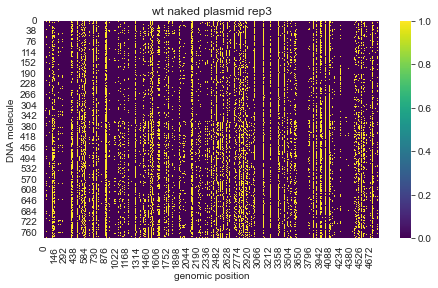

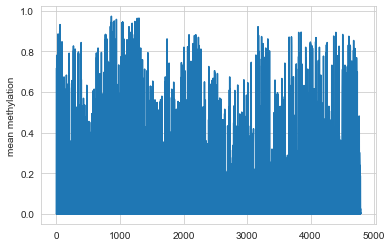

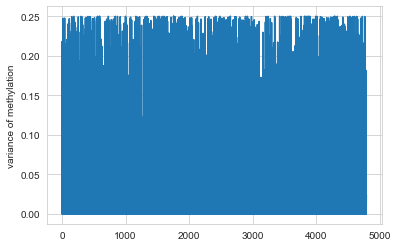

<AxesSubplot:title={'center':'naked plasmid wt rep3, entropy per position'}, ylabel='entropy'>

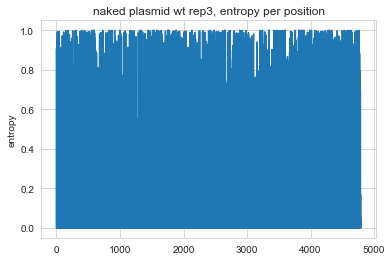

In [42]:
plt.figure(figsize=(7.5,4))
sns.heatmap(wt_rep3_naked_plasmid, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt naked plasmid rep3")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.mean(axis = 0))
plt.ylabel("mean methylation")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.std(axis = 0)**2)
plt.ylabel("variance of methylation")
plt.show()

g = sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_naked_plasmid))
g.set_ylabel("entropy")
g.set_title("naked plasmid wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

<AxesSubplot:title={'center':'nucarray wt rep3, entropy per position'}, ylabel='entropy'>

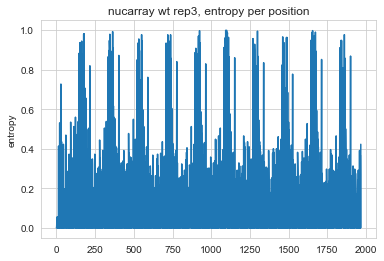

In [43]:
g = sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_nucarray))
g.set_ylabel("entropy")
g.set_title("nucarray wt rep3, entropy per position")
g

In [44]:
#test = pd.read_csv("controls/naked_plasmid_wt_rep2_noNA.csv", header = None)
#test_array = np.array(test)
#test_array.shape
#np.savetxt("controls/naked_plasmid_wt_rep2_1000reads.txt", test_array#)

In [45]:
## How do the mutants change the variability of methylation for the "naked plasmid" ?
wt_rep2_naked_plasmid = np.loadtxt("controls/naked_plasmid_wt_rep2_1000reads.txt")

dies6_rep1_naked = np.loadtxt("controls/DIES6_ALL_REP1_naked_plasmid.txt")
dies6_rep2_naked = np.loadtxt("controls/DIES6_rep2_780READS_naked_plasmid.txt")

disw2_rep1_naked = np.loadtxt("controls/naked_plasmid_disw2_rep1_clean_780READS.csv")
disw2_rep2_naked = np.loadtxt("controls/naked_plasmid_disw2_rep2_clean_780_reads.csv")

Text(0.5, 1.0, 'naked plasmid wt rep2, entropy per position')

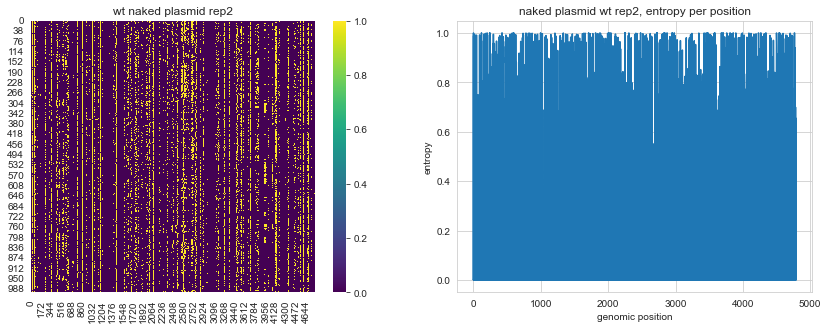

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.heatmap(wt_rep2_naked_plasmid, cmap = "viridis", ax =ax1)
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
ax1.set_title("wt naked plasmid rep2")

sns.set_style("whitegrid")
sns.lineplot(x = range(wt_rep2_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep2_naked_plasmid), ax = ax2)
plt.ylabel("entropy")
ax2.set_title("naked plasmid wt rep2, entropy per position")


<AxesSubplot:title={'center':'naked plasmid disw2 rep1, entropy per position'}, ylabel='entropy'>

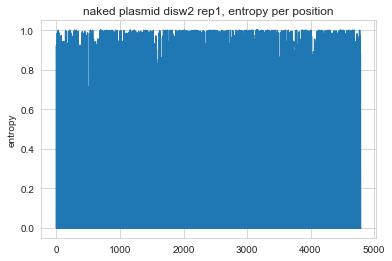

In [47]:
g = sns.lineplot(x = range(disw2_rep1_naked.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, disw2_rep1_naked))
g.set_ylabel("entropy")
g.set_title("naked plasmid disw2 rep1, entropy per position")
g

## Read in samples for origin ARS305 to set up the annotation of the nucleosome areas

## Wildtype

In [48]:
load_dir =  "ARS305"

In [49]:
ARS305_wt_rep2.shape

NameError: name 'ARS305_wt_rep2' is not defined

In [ ]:
ARS305_wt = np.loadtxt("ARS305/wt_mat_Megalodon_repIII_ARS305_end_LexA.txt")

#replicate 2
ARS305_wt_rep2 = np.genfromtxt("ARS305/ARS305_wt_REP2_noNA.csv", dtype = int, delimiter = ",") #715 reads
#feature annotation

#ARS305_anno = pd.read_csv("ARS305/Features_from ARS305_end_LexA _(31 .. 1124).txt", sep  = "\t", 
#                          header = None, index_col = 0)
#ARS305_anno.columns = ["position", "length"]

#ARS305_anno = pd.read_csv("ARS305/coordinates_ARS305.txt", sep  = "\t", 
#                          header = None, index_col = 0)

ARS305_anno = pd.read_csv(load_dir + "/ARS305_80bp.txt", sep  = "\t", 
                          header = None, index_col = 0)
ARS305_anno.columns = ["position"]

ARS305_anno.index = ARS305_anno.index.astype("string")
ARS305_anno.index = ARS305_anno.index.str.strip()

ARS305_anno["pos_start"] = ARS305_anno.position.str.split("-").str[0].astype(int) -1
ARS305_anno["pos_stop"] = ARS305_anno.position.str.split("-").str[1].astype(int) -1

ARS305_anno["length"] = ARS305_anno.pos_stop - ARS305_anno.pos_start

In [ ]:
#data for reverse strands:

wt_rep3_rev = np.loadtxt( load_dir + "/wt_repIII_ARS305_end_LexA_rev.txt") #780 reads
wt_rep2_rev = np.loadtxt( load_dir + "/wt_repII_ARS305_rev.txt") #780 reads

dies6_rep1_rev = np.loadtxt(load_dir + "/DIES6_ALL_REP1_ARS305_rev.txt") #780 reads
dies6_rep2_rev = np.loadtxt(load_dir + "/DIES6_ALLstrains_meth_REP2_ARS305_rev.txt") #780 reds

#disw2_rep1_rev = np.loadtxt(load_dir + "/DIES6_ALL_REP1_ARS305_rev.txt") 
disw2_rep2_rev = np.loadtxt(load_dir + "/disw2_all_meth_REP2_ARS305_rev.txt") #780 reads
disw2_rep2_rev.shape


In [ ]:
N=10

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1083), y = np.convolve(ARS305_wt.mean(axis=0)[:1083], np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
sns.lineplot(x = range(1083), y = np.convolve(wt_rep3_rev.mean(axis=0), np.ones(N)/N, mode ="same"), 
             color ="darkorange", label="wt rep3 reverse")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

#plt.figure(figsize=(7, 5))
sns.heatmap(ARS305_wt, cmap ="viridis")
plt.show()
sns.heatmap(wt_rep3_rev, cmap ="viridis")

In [ ]:
np.isnan(wt_rep3_join.mean(axis=0)).sum()

In [ ]:
N=30
plt.figure(figsize=(13, 9))
wt_rep3_join = np.concatenate((ARS305_wt[:, :1083], wt_rep3_rev), axis = 0)

sns.lineplot(x = range(1083), y = np.convolve(wt_rep3_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="black", label="wt rep3 both strands")
sns.lineplot(x = range(1083), y = np.convolve(ARS305_wt.mean(axis=0)[:1083], np.ones(N)/N, mode="same"),
             color ="red", label="wt rep3 forward", alpha =0.6)
plt.ylabel("mean methylation")
plt.title("ARS305, smoothening window size " + str(N))
plt.show()

In [ ]:
#plot the raw data:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3")
plt.show()

#and the bulk data:
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep3")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

#wildtype replicate 2:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep2")
plt.show()

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt_rep2.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep2")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

In [ ]:
smooth_window = 10

def smooth(array):
        return np.convolve(array, np.ones(smooth_window)/smooth_window, mode = "same")
    
ARS305_wt_smooth = np.apply_along_axis(smooth, 0, ARS305_wt)
    
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3, smooth: " + str(smooth_window))
plt.show()

sns.lineplot(x = range(ARS305_wt_smooth.shape[1]), 
                 y = ARS305_wt_smooth.std(axis = 0)**2
                )
plt.ylabel("Variance of methylation per position")
plt.xlim(0, 1084)
plt.axvline(ARS305_anno.loc["ARS305", "pos_start"], color = "purple")
plt.show()

In [ ]:
#this computes the percent of methylation at a specific base

#sns.lineplot(x = range(ARS305_wt.shape[1]), 
#             y = ARS305_wt[779,:].cumsum(axis = 0)/780)
ARS305_wt[779,:].cumsum(axis = 0)/780

In [ ]:
#as a measure for the heterogeneity, try the entropy:
# alternatively, try: from scipy.stats import entropy
import math

def entropy(labels, base=None):
    base = 2 if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

#https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

#entropy(ARS305_wt[:,6])
#np.unique(ARS305_wt[:,6], return_counts = True)

g = sns.lineplot(x = range(630-542), y = np.apply_along_axis(entropy, 0, ARS305_wt[:, 542:630]))
g.set_xticks(range(0, 630-542, 5))
g

In [ ]:
sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue"
            )
plt.ylabel("Variance of methylation")
plt.xlabel("Genomic position")

plt.xlim(0, 1084)

plt.show()

g = sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, ARS305_wt))
g.set_ylabel("entropy")
g.set_title("ARS305 wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

In [ ]:
entropy_ARS305_wt = np.apply_along_axis(entropy, 0, ARS305_wt)
entropy_ARS305_wt.min(), entropy_ARS305_wt.max(), np.count_nonzero(entropy_ARS305_wt)

In [ ]:
N = 10

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt_smooth.shape[1])
plt.title("ARS305 wildtype rep3, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()
    
# Compare that the other replicate
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt_rep2.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt_smooth.shape[1])
plt.title("ARS305 wildtype rep2, smooth window:" + str(N))
sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()
    
# Concatenate the wildtype replicates and plot the mean and the variance again:

joined_wt = np.concatenate((ARS305_wt, ARS305_wt_rep2), axis = 0)

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, joined_wt.shape[1])
plt.title("Pooled replicates wildtype, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = joined_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()

## Load data for mutant dies6

In [ ]:
ARS305_disw2_rep1.shape

In [ ]:
ARS305_dies6_rep1 = np.loadtxt("ARS305/DIES6_ALL_REP1_ARS305_end_LexA.txt")
ARS305_dies6_rep1.shape

sns.heatmap(ARS305_dies6_rep1, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep1.shape[1])
plt.title("ARS305 dies6 rep1")
plt.show()

ARS305_dies6_rep2 = np.genfromtxt("ARS305/DIES6_ARS305_REP2_780READS.csv", dtype = int, delimiter = ",")
ARS305_dies6_rep2.shape

sns.heatmap(ARS305_dies6_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep2.shape[1])
plt.title("ARS305 dies6 rep2")
plt.show()

In [ ]:
#subsample to the same number of molecules than in 316
#rep1 -> 83
#rep2 -> 301

#def subsample(df, n):
#    np.random.seed(0)
#    return df[np.random.RandomState(seed=24).choice(len(df), n)]

def subsample(array, n):
    np.random.seed(15)
    idx = np.random.randint(len(array), size=n)
    return array[idx,:]

test1 = subsample(ARS305_dies6_rep1, 100)
test2 = subsample(ARS305_dies6_rep2, 300)

sns.heatmap(test1, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep1.shape[1])
plt.title("ARS305 subsampling, dies6 rep1")
plt.show()

sns.heatmap(test2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep2.shape[1])
plt.title("ARS305, subsampling dies6 rep2")
plt.show()

In [ ]:
#ARS305_dies6_rep1 = subsample(ARS305_dies6_rep1, 83)
#ARS305_dies6_rep2 = subsample(ARS305_dies6_rep2, 301)

In [ ]:
smooth = 1

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_dies6_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "dies6 rep1")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_dies6_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "dies6 rep2")
plt.title("smooth window " + str(smooth))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

ARS305_wt_smooth_mean = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_dies6_rep1_smooth_mean = np.convolve(ARS305_dies6_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_dies6_rep2_smooth_mean = np.convolve(ARS305_dies6_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_ARS305 = np.concatenate((ARS305_wt_smooth_mean.reshape(1, 1084), 
                              ARS305_dies6_rep1_smooth_mean.reshape(1, 1084),
                              ARS305_dies6_rep2_smooth_mean.reshape(1, 1084)),
                              axis = 0)

from scipy.stats import wilcoxon

w, p = wilcoxon(means_ARS305[0,:], means_ARS305[1,:], alternative = "two-sided")
w,p

In [ ]:
#the statistical test shows that the replicates of the mutants are rather different: 
wilcoxon(ARS305_dies6_rep1.mean(axis = 0), 
         ARS305_dies6_rep2.mean(axis = 0), alternative = "two-sided")

## Load data for mutant disw2

In [ ]:
ARS305_disw2_rep1 = np.genfromtxt("ARS305/ARS305_disw2_rep1_780READS_noNA.csv", dtype = int,
                                 delimiter = ",")
print(ARS305_disw2_rep1.shape)

sns.heatmap(ARS305_disw2_rep1, cmap = "viridis")
plt.xlabel("Genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_disw2_rep1.shape[1])
plt.title("ARS305 disw2 rep1")
plt.show()

ARS305_disw2_rep2 = np.genfromtxt("ARS305/ARS305_disw2_rep2_780READS_noNA.csv", dtype = int, delimiter = ",")
ARS305_disw2_rep2.shape

sns.heatmap(ARS305_disw2_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_disw2_rep2.shape[1])
plt.title("ARS305 disw2 rep2")
plt.show()

In [ ]:
smooth_width = 30

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep1.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "green", label = "disw2 rep1")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep2.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "purple", label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

In [ ]:
# calculate the mean over all molecules and smooth with window size "smooth"

ARS305_disw2_rep1_smooth_mean = np.convolve(ARS305_disw2_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_disw2_rep2_smooth_mean = np.convolve(ARS305_disw2_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_ARS305 = np.concatenate((means_ARS305, 
                              ARS305_disw2_rep1_smooth_mean.reshape(1, 1084),
                              ARS305_disw2_rep2_smooth_mean.reshape(1, 1084)),
                              axis = 0)

w, p = wilcoxon(ARS305_disw2_rep1.mean(axis = 0),
                ARS305_disw2_rep2.mean(axis = 0), alternative = "two-sided")
w,p

## Join the matrices for forward and reverse strand

In [ ]:
wt_rep2_join = np.concatenate((ARS305_wt_rep2[:, :1083], wt_rep2_rev), axis = 0)

dies6_rep1_join = np.concatenate((ARS305_dies6_rep1[:, :1083], dies6_rep1_rev), axis = 0)

#subsample dies6_rep2_rev to 715 reads
dies6_rep2_rev_sub = subsample(dies6_rep2_rev, 715)
dies6_rep2_join = np.concatenate((ARS305_dies6_rep2[:, :1083], dies6_rep2_rev_sub), axis = 0)

#disw2_rep1_join = np.concatenate((ARS305_disw2_rep1[:, :1083], disw2_rep1_rev), axis = 0)
disw2_rep2_join = np.concatenate((ARS305_disw2_rep2[:, :1083], disw2_rep2_rev), axis = 0)

In [ ]:
#assign the old variable names for a quick check for the effects of the reverse strand

ARS305_wt = wt_rep3_join
ARS305_wt_rep2 = wt_rep2_join

ARS305_dies6_rep1 = dies6_rep1_join
ARS305_dies6_rep2 = dies6_rep2_join

ARS305_disw2_rep1 = disw2_rep2_join
ARS305_disw2_rep2 = disw2_rep2_join

## Normalize each experiment to maximum values, and pool replicates

In [ ]:
#[Normalize pooled wt replicates to max values (the minimum is always 0 with this kind of data, 
# so this simplifies the normalization to max-scaling)]

###wt_min_max = joined_wt.mean(axis = 0)/joined_wt.mean(axis = 0).max()
# normalize the mean values of the mutants to the values of the wildtype
#dies6_min_max = joined_dies6.mean(axis = 0)/joined_dies6.mean(axis = 0).max()
#disw2_min_max = joined_disw2.mean(axis = 0)/joined_disw2.mean(axis = 0).max()

#pool the mutant replicates
#joined_dies6 = np.concatenate((ARS305_dies6_rep1, ARS305_dies6_rep2), axis = 0)
#joined_dies6.shape

#joined_disw2 = np.concatenate((ARS305_disw2_rep1, ARS305_disw2_rep2), axis = 0)
#joined_disw2.shape


wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.mean(axis = 0).max()
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.mean(axis = 0).max()

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.mean(axis = 0).max()
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.mean(axis = 0).max()

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.mean(axis = 0).max()
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.mean(axis = 0).max()

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

In [ ]:
N=30

sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_wt, np.ones(N)/N, mode="same"), #wt_min_max
             color = "black", 
            label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same"), #dies6_min_max
             color = "orange", alpha = 0.7,
            label = "dies6")
sns.lineplot(x = range(pooled_wt.shape[0]),
            y = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same"), #disw2_min_max
            color = "steelblue", alpha = 0.7,
            label = "disw2")
plt.title("ARS305, min-max normalised and pooled, smoothened with " + str(N)) #pooled and min-max normalised
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")

In [ ]:
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "orange", 
             label = "dies6/wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "steelblue",
             label = "disw2/wt")
plt.ylabel("fold change")
plt.title("Fold change between mutant and wildtype")


### Compare mean distributions between pooled replicates and wildtype with paired wilcoxon test

In [ ]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [pooled_dies6[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["dies6_mean"] = pd.Series(array_list, index = segments.index)

#disw2 mutant

array_list = [pooled_disw2[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["disw2_mean"] = pd.Series(array_list, index = segments.index)

In [ ]:
segments["p_value_dies6"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:6], axis =1, inplace = True)

In [ ]:
segments
#segments.to_csv(load_dir + "/ARS305_pooled_samples_two-sided-test.csv")

In [ ]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6"] < pvalue)]

In [ ]:
#Regions significant for disw2:
print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2"] < pvalue)]

### Compare pooled wildtype to mutant replicates, then filter regions

In [ ]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [dies6_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [dies6_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep2"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [disw2_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [disw2_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep2"] = pd.Series(array_list, index = segments.index)

#perform statistical test
segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:8], axis =1, inplace = True)

In [ ]:
segments
#segments.to_csv(load_dir + "/AR305_separate_replicates_two-sided-test.csv")

In [ ]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
            (segments["p_value_dies6_rep2"] < pvalue)]

In [ ]:
#Regions significant for disw2:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
            (segments["p_value_disw2_rep2"] < pvalue)]

In [ ]:
ARS305_anno

In [ ]:
# How does that look over the whole sequence?

sns.set_style("white")
smooth_width = 30

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "dies6 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "dies62 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

### Normalize part of the ARS305 sequence to part of the naked plasmid 

bases 4083 -4792 in the naked plasmid correspond to 
223 -932 in ARS305

they contain: L-1, NS-1, ARS305, NS+1, L+1 and a part of NS+2

In [ ]:
#subset the overlap in between the sequences

overlap_plasmid_wt3 = wt_rep3_naked_plasmid[:, 4082:4791]
overlap_plasmid_wt2 = wt_rep2_naked_plasmid[:, 4082:4791]

overlap_plasmid_dies6_1 = dies6_rep1_naked[:, 4082:4791]
overlap_plasmid_dies6_2 = dies6_rep2_naked[:, 4082:4791]

overlap_plasmid_disw2_1 = disw2_rep1_naked[:, 4082:4791]
overlap_plasmid_disw2_2 = disw2_rep2_naked[:, 4082:4791]

overlap_ARS305_wt3 = ARS305_wt[:, 222:931]
overlap_ARS305_wt2 = ARS305_wt_rep2[:, 222:931]

overlap_ARS305_dies6_1 = ARS305_dies6_rep1[:, 222:931]
overlap_ARS305_dies6_2 = ARS305_dies6_rep2[:, 222:931]
overlap_ARS305_disw2_1 = ARS305_disw2_rep1[:, 222:931]
overlap_ARS305_disw2_2 = ARS305_disw2_rep2[:, 222:931]

In [ ]:
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt3.mean(axis = 0), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt2.mean(axis = 0), 
             color = "orange", label = "ARS305 wt rep2", alpha = 0.6)

In [ ]:
overlap_plasmid_wt_joined = np.concatenate((overlap_plasmid_wt3, overlap_plasmid_wt2), axis = 0).mean(axis=0)

In [ ]:
N=30


sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_plasmid_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_plasmid_wt2.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
#sns.lineplot(x = range(overlap_ARS305.shape[1]), 
#             y = np.convolve(overlap_plasmid_wt_joined, np.ones(N)/N, mode ="same"), 
#             color = "darkgreen", label = "joined plasmids", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_ARS305_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt rep3")
plt.ylabel("mean methylation")
plt.title("Mean values before normalization")

In [ ]:
#before normalization, max-scale replicates, pool and average

#plasmid control wt
overlap_wt3_maxnorm = wt_rep3_naked_plasmid[:, 4082:4791].mean(axis=0)/wt_rep3_naked_plasmid[:, 4082:4791].mean(axis=0).max()
overlap_wt2_maxnorm = wt_rep2_naked_plasmid[:, 4082:4791].mean(axis=0)/wt_rep2_naked_plasmid[:, 4082:4791].mean(axis=0).max()

sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt3_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
plt.ylabel("mean methylation")
plt.title("Max normalized wt samples")
plt.show()

overlap_wt_maxnorm = np.concatenate((overlap_wt3_maxnorm.reshape(-1, 709),
                                     overlap_wt2_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)
#plasmid control for dies6
overlap_dies61_maxnorm = dies6_rep1_naked[:, 4082:4791].mean(axis=0)/dies6_rep1_naked[:, 4082:4791].mean(axis=0).max()
overlap_dies62_maxnorm = dies6_rep2_naked[:, 4082:4791].mean(axis=0)/dies6_rep2_naked[:, 4082:4791].mean(axis=0).max()
overlap_dies6_maxnorm = np.concatenate((overlap_dies61_maxnorm.reshape(-1, 709),
                                     overlap_dies62_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)

#plasmid control for disw2
overlap_disw21_maxnorm = disw2_rep1_naked[:, 4082:4791].mean(axis=0)/disw2_rep1_naked[:, 4082:4791].mean(axis=0).max()
overlap_disw22_maxnorm = disw2_rep2_naked[:, 4082:4791].mean(axis=0)/disw2_rep2_naked[:, 4082:4791].mean(axis=0).max()
overlap_disw2_maxnorm = np.concatenate((overlap_disw21_maxnorm.reshape(-1, 709),
                                     overlap_disw22_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)

sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_dies6_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "plasmid dies6", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid disw2")
plt.ylabel("mean methylation")
plt.title("Max normalized samples averaged by condition")

In [ ]:
#normalize conditions for ARS305 to the respective plasmid control
# here, normalize each sample from the origin to the pooled control from the respective plasmid sample
norm_overlap_ARS305_wt3 = (overlap_ARS305_wt3.mean(axis=0)+ 0.01)/(overlap_wt_maxnorm+0.01)
norm_overlap_ARS305_dies6_rep1 = (overlap_ARS305_dies6_1.mean(axis=0)+ 0.01)/(overlap_dies6_maxnorm+0.01)
norm_overlap_ARS305_disw2_rep1 = (overlap_ARS305_disw2_1.mean(axis=0)+ 0.01)/(overlap_disw2_maxnorm+0.01)

N=30

sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_wt3, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_dies6_rep1, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep1", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_disw2_rep1, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1")
plt.ylabel("normalized methylation")
plt.title("Normalizing samples to plasmid control")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")

In [ ]:
#Comparing to the normalization to maximum values scaled samples per experiment

sns.lineplot(x = range(222,931), 
                 y = np.convolve(pooled_wt[222:931], np.ones(N)/N, mode ="same"),
             color = "blue", label = "wt pooled", alpha = 0.6)
sns.lineplot(x = range(222,931), 
                 y = np.convolve(disw2_rep1_minmax[222:931], np.ones(N)/N, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(222,931), 
                 y = np.convolve(dies6_rep1_minmax[222:931], np.ones(N)/N, mode ="same"),
             color = "darkgreen", label = "dies6 rep1", alpha = 0.6)
plt.title("ARS305 clipping, max scaled samples, smooth window " + str(N))

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
    
plt.show()

In [ ]:
# Different approach: Normalize samples in between experiments - ARS305 wt rep3 to plasmid wt rep3
print("Normalize origin ARS305 to part of the plasmid sequence (without scaling)")
sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_wt[:, 222:931].mean(axis = 0)+0.01)/(wt_rep3_naked_plasmid[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "steelblue", label = "ARS305 wt rep3/plasmid wt rep3", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_wt_rep2[:, 222:931].mean(axis = 0)+0.01)/(wt_rep2_naked_plasmid[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkblue", label = "ARS305 wt rep2/plasmid wt rep2", alpha = 0.6)
plt.show()

sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_dies6_rep1[:, 222:931].mean(axis = 0)+0.01)/(dies6_rep1_naked[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "green", label = "ARS305 dies6 rep1/plasmid dies6 rep1", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_dies6_rep2[:, 222:931].mean(axis = 0)+0.01)/(dies6_rep2_naked[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep2/plasmid dies6 rep2", alpha = 0.6)
plt.show()


sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_disw2_rep1[:, 222:931].mean(axis = 0)+0.01)/(disw2_rep1_naked[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1/plasmid disw2 rep1", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_disw2_rep2[:, 222:931].mean(axis = 0)+0.01)/(disw2_rep2_naked[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkred", label = "ARS305 disw2 rep2/plasmid disw2 rep2", alpha = 0.6)
plt.show()

In [ ]:
#Pool replicates per condition and compare the plasmid control

ARS305_wt3_norm = (ARS305_wt[:, 222:931].mean(axis = 0)+0.1)/(wt_rep3_naked_plasmid[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_wt2_norm = (ARS305_wt_rep2[:, 222:931].mean(axis = 0)+0.1)/(wt_rep2_naked_plasmid[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_wt_norm_pooled = np.concatenate((ARS305_wt3_norm.reshape(-1, 709), ARS305_wt3_norm.reshape(-1, 709)), axis=0).mean(axis = 0)

ARS305_dies61_norm = (ARS305_dies6_rep1[:, 222:931].mean(axis = 0)+0.1)/(dies6_rep1_naked[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_dies62_norm = (ARS305_dies6_rep2[:, 222:931].mean(axis = 0)+0.1)/(dies6_rep2_naked[:, 4082:4791].mean(axis = 0)+0.1) 
ARS305_dies6_norm_pooled = np.concatenate((ARS305_dies61_norm.reshape(-1, 709), ARS305_dies62_norm.reshape(-1, 709)), axis=0).mean(axis = 0)

ARS305_disw21_norm = (ARS305_disw2_rep1[:, 222:931].mean(axis = 0)+0.1)/(disw2_rep1_naked[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_disw22_norm = (ARS305_disw2_rep2[:, 222:931].mean(axis = 0)+0.1)/(disw2_rep2_naked[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_disw2_norm_pooled = np.concatenate((ARS305_disw21_norm.reshape(-1, 709), ARS305_disw22_norm.reshape(-1, 709)), axis=0).mean(axis = 0)

In [ ]:
sns.set_style("whitegrid")
sns.lineplot(x = range(222,931), 
             y = np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt pooled", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(ARS305_dies6_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "ARS305 dies6 pooled", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(ARS305_disw2_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#f2180c", label = "ARS305 disw2 pooled", alpha = 0.6)
plt.title("Normalize ARS305 to plasmid spike-in and pool replicates")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
#plt.savefig("controls/ARS305_plasmid_norm_pooled_samples.png", dpi=300)
plt.show()

sns.lineplot(x = range(222,931), 
             y = np.convolve(ARS305_dies6_norm_pooled, np.ones(N)/N, mode ="same")/np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "ARS305 dies6/wt", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(ARS305_disw2_norm_pooled, np.ones(N)/N, mode ="same")/np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#f2180c", label = "ARS305 disw2/wt", alpha = 0.6)
plt.title("Fold changes of normalised and smoothed data")
plt.show()

#compare trend to max scaled dsitributions from pooled data:
sns.lineplot(x = range(222,931),
             y = np.convolve(pooled_wt[222:931], np.ones(N)/N, mode="same"),
             color = "black", 
            label = "wt")
sns.lineplot(x = range(222,931),
             y = np.convolve(pooled_dies6[222:931], np.ones(N)/N, mode="same"),
             color = "#0a22fa", alpha = 0.6,
            label = "dies6")
sns.lineplot(x = range(222,931),
            y = np.convolve(pooled_disw2[222:931], np.ones(N)/N, mode = "same"),
            color = "#f2180c", alpha = 0.6,
            label = "disw2")
#plt.savefig("controls/ARS305_max_norm_pooled_samples.png", dpi=300)
plt.show()

In [ ]:
#Search for differentially methylated features in data that was normalised to plasmid data

segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [ARS305_wt_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_norm_plasmid"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [ARS305_dies61_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_rep1_norm_plasmid"] = pd.Series(array_list, index = segments.index)

array_list = [ARS305_dies62_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_rep2_norm_plasmid"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [ARS305_disw21_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_rep1_norm_plasmid"] = pd.Series(array_list, index = segments.index)

array_list = [ARS305_disw22_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_rep2_norm_plasmid"] = pd.Series(array_list, index = segments.index)

In [ ]:
# for plasmid normlaised data, we don't have values for +2ns, +L, +3ns. So, discard these rows
segments.drop(segments.index[-3:], axis = 0, inplace=True)

In [ ]:
#perform statistical test
segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"dies6_rep1_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"dies6_rep2_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"disw2_rep1_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"disw2_rep2_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:8], axis =1, inplace = True)

In [ ]:
segments

In [ ]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
            (segments["p_value_dies6_rep2"] < pvalue)]

In [ ]:
#Regions significant for disw2:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
            (segments["p_value_disw2_rep2"] < pvalue)]

In [ ]:
smooth_width = 30

sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_wt_norm_pooled, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_disw21_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_disw22_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    if border < 800:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if border < 800:
        plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_wt_norm_pooled, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_dies61_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "dies6 rep1")
sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_dies62_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "dies6 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    if border < 800:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if border < 800:
        plt.axvline(border, color = "dimgray")
    
plt.show()

## Compare average methylation per feature

In [ ]:
#Display the mean methylation per feature

def condense_features(array, anno):
    output = np.empty(array.shape[0],)
    for index in anno.index:
        feature_array = array[:, anno.loc[index, "pos_start"]: anno.loc[index, "pos_stop"]]
        means_by_feature = np.apply_along_axis(np.mean, 1, feature_array)
        #means_by_feature = np.apply_along_axis(np.std, 1, feature_array)**2 #to calculate variance
        output = np.column_stack((output, means_by_feature))
    return output[:, 1:]

In [ ]:
#condense methylation by feature 

wt_rep3_feat_me = condense_features(ARS305_wt, ARS305_anno)
wt_rep2_feat_me = condense_features(ARS305_wt_rep2, ARS305_anno)
wt_pool = np.concatenate((wt_rep3_feat_me, wt_rep2_feat_me), axis = 0)

dies6_rep1_feat_me = condense_features(ARS305_dies6_rep1, ARS305_anno)
dies6_rep2_feat_me = condense_features(ARS305_dies6_rep2, ARS305_anno)
dies6_pool = np.concatenate((dies6_rep1_feat_me, dies6_rep2_feat_me), axis= 0)

disw2_rep1_feat_me = condense_features(ARS305_disw2_rep1, ARS305_anno)
disw2_rep2_feat_me = condense_features(ARS305_disw2_rep2, ARS305_anno)
disw2_pool = np.concatenate((disw2_rep1_feat_me, disw2_rep2_feat_me), axis = 0)

In [ ]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

print("Comparing replicates")
#wt
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.violinplot(data = wt_rep3_feat_me, axis = 1, color = "grey", ax=ax1)
ax1.set_title("wt rep3")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-0.2,1)
ax1.set_ylabel("mean methylation by feature")
plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = wt_rep2_feat_me, axis = 1, color = "grey", ax=ax2)
ax2.set_title("wt rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-0.2,1)
plt.setp(ax2.collections, alpha = 0.6)
plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_wt.tif")
plt.show()

#dies6
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.violinplot(data = dies6_rep1_feat_me, axis = 1, color = "#0a22fa", ax=ax1)
ax1.set_title("dies6 rep1")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-0.2,1)
ax1.set_ylabel("mean methylation by feature")
plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = dies6_rep2_feat_me, axis = 1, color = "#0a22fa", ax=ax2)
ax2.set_title("dies6 rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-0.2,1)
plt.setp(ax2.collections, alpha = 0.6)
plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_dies6.tif")
plt.show()

#disw2
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.violinplot(data = disw2_rep1_feat_me, axis = 1, color = "#f2180c", ax=ax1)
ax1.set_title("disw2 rep1")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-0.2,1)
ax1.set_ylabel("mean methylation by feature")
plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = disw2_rep2_feat_me, axis = 1, color = "#f2180c", ax=ax2)
ax2.set_title("disw2 rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-0.2,1)
plt.setp(ax2.collections, alpha = 0.6)
plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_disw2.tif")
plt.show()

In [ ]:
#Combine the violinplots into one plot per replicate:
#for each feature, plot wt and mutants next to each other

#transfer array to dataframe, melt that into the long form and assign a catergory "condition"
feat_me_wt_rep3 = pd.DataFrame(wt_rep3_feat_me, columns = ARS305_anno.index)
feat_me_wt_rep3["molecule"] = feat_me_wt_rep3.index
feat_me_wt_rep3_melt = pd.melt(feat_me_wt_rep3, id_vars=("molecule"), var_name = ("feature"))
feat_me_wt_rep3_melt["condition"] = "wt rep3"

feat_me_wt_pool = pd.DataFrame(wt_pool, columns = ARS305_anno.index)
feat_me_wt_pool["molecule"] = feat_me_wt_pool.index
feat_me_wt_melt = pd.melt(feat_me_wt_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_wt_melt["condition"] = "wt"


#the same for dies6
feat_me_dies6_rep2 = pd.DataFrame(dies6_rep2_feat_me, columns = ARS305_anno.index)
feat_me_dies6_rep2["molecule"] = feat_me_dies6_rep2.index

feat_me_dies6_rep2_melt = pd.melt(feat_me_dies6_rep2, id_vars=("molecule"), var_name = ("feature"))
feat_me_dies6_rep2_melt["condition"] = "dies6"

feat_me_dies6_pool = pd.DataFrame(dies6_pool, columns = ARS305_anno.index)
feat_me_dies6_pool["molecule"] = feat_me_dies6_pool.index
feat_me_dies6_melt = pd.melt(feat_me_dies6_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_dies6_melt["condition"] = "dies6"

#the same for disw2
feat_me_disw2_rep1 = pd.DataFrame(disw2_rep1_feat_me, columns = ARS305_anno.index)
feat_me_disw2_rep1["molecule"] = feat_me_disw2_rep1.index

feat_me_disw2_rep1_melt = pd.melt(feat_me_disw2_rep1, id_vars=("molecule"), var_name = ("feature"))
feat_me_disw2_rep1_melt["condition"] = "disw2"

feat_me_disw2_pool = pd.DataFrame(disw2_pool, columns = ARS305_anno.index)
feat_me_disw2_pool["molecule"] = feat_me_disw2_pool.index
feat_me_disw2_melt = pd.melt(feat_me_disw2_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_disw2_melt["condition"] = "disw2"

#merge into one dataframe:
methylation_rep1 = pd.concat([feat_me_wt_melt, feat_me_dies6_melt, feat_me_disw2_melt])
methylation_rep1.rename(columns = {"value" : "mean methylation"}, inplace=True)

In [ ]:
col_Anna = ["black", "#0a22fa", "#f2180c"]

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

plt.figure(figsize = (15,7))
ax = sns.violinplot(data = methylation_rep1, x="feature", y = "mean methylation", hue = "condition", 
                    palette = col_Anna)
plt.setp(ax.collections, alpha = 0.6)
#plt.ylabel("variance")
plt.title("Average methylation by feature and condition")
#plt.ylim(-0.05, 0.3)
#plt.title("Average methylation by feature and condition")
#plt.savefig(load_dir + "/plots/ARS305_pooled_av_variation_by_feature_anno3.tif", dpi = 300)
#plt.savefig(load_dir + "/plots/ARS305_pooled_av_methylation_by_feature_anno3.tif", dpi = 300)
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

#Calculate p-values for the distributions in the violins using the mann-whitney U test

feature_pvalues = ARS305_anno.drop(columns = "position")
feature_pvalues["dies6_rep2"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_dies6_rep2.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not column == "molecule"]
feature_pvalues["disw2_rep1"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_disw2_rep1.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not column == "molecule"]

feature_pvalues

In [ ]:
feature_pvalues[feature_pvalues.dies6_rep2 >= 2.5e-2]

In [ ]:
feature_pvalues[feature_pvalues.disw2_rep1 >= 2.5e-2]

In [ ]:
#Calculate p-values for the distributions in the violins using the mann-whitney U test

feature_pvalues = ARS305_anno.drop(columns = "position")
feature_pvalues["dies6_pool"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_dies6_pool.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not column == "molecule"]
feature_pvalues["disw2_pool"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_disw2_pool.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not column == "molecule"]

feature_pvalues

In [ ]:
feature_pvalues[feature_pvalues.dies6_pool >= 2.5e-2]

In [ ]:
feature_pvalues[feature_pvalues.disw2_pool >= 2.5e-2]

In [ ]:
#feature_pvalues.to_csv(load_dir + "/ARS305_p_values_avg_feature_methylation.csv")

## Plot the per base efficiency for the whole ARS305 origin:

In [ ]:
#prepare the data:
seq = "atgaaagaatacgttattctttcatcaaatcgtggtcgaccggcatgcaagctccctcgagAAATACAGAATAGGAAAGTAAAAGGCAATATATGAATGCAGTGCTTGTAACTGGTGCTTGTATCCAAGAATAGCTTCTTGCTGTAGGTTATGGGAATATCGTGTAAGCTGGGGTGACTTTTGAGCTATTCGCGACGCCCGACGCCGTAATAACTACTTTCGACAGACCACTTATGACAGTATTTCAGGCCGCTCTTATAAAATGACATGTTAACAAACAGTTCTGATTATTCGCCTTTTGACAGGACGATAATGTAAATAGTTGTGGTAGTATCATTCAGGTATGTAACTGTTTACTTTGTATCGCTTGAAAAAAATAAGCATTTCAGAGCCTTCTTTGGAGCTCAAGTGGATTGAGGCCACAGCAAGACCGGCCAGTTTGAATGCTCAACTCTTCAAAAGAAATTCCTCAAATATGTCCAGTTTCATGTACTGTCCGGTGTGATTTATTATTTTTTATTTACTTTGTAGTTCTTAAAGCTAAGATTTTTTTCTTTGATAAATTCTTGTTTTCATATCCTAAAATTAAAGGGAAAATAAACAATACATAACAAAACATATAAAAACCAACACAATAAAAAAAAGGATCAAATACTCATTAAAGTAACTTACACGGGGGCTAAAAACGGAGTTTGATGAATATTCACAAGATAAAAATCATATGTATGTTTCTGATATATCGATATACAATCAAACACTTTCAAGAATTTGTTTGTAGACTTTTTGCTAGAGACCTCATCAAAGTGCTACCAACTAAGATCAACTTATACTTCTTTTAGAGAAAATTTTTTTCAATGTACTCCAAAGAGATTTAGATCCTGTCTCTTCCTCTTCCTCTTCCTCGAAAGTCAAAGAAAAATCAGAGTCTCCCTGCTTATTCAGGCGGAGAGGCTCTAGGGTAGTTGCGTTTCTCTCATTGGGACACTGAACCTCATTTTCCAACATTTTGGTCATGTAAGAGGCGACAGGCTCATCGCAGGTGGGTGCATCAACATGGTAGTACCTGGACCAAGCGCTACATTG"
seq = seq.lower()
eff_df = pd.DataFrame({"wt_rep3": wt_rep3_minmax}, index=range(1083)) #wt_rep3_minmax #ARS305_wt.mean(axis=0)

eff_df["base"] = [letter for letter in seq]


eff_df["wt_rep2"] = ARS305_wt_rep2.mean(axis=0)
eff_df["dies6_rep1"] = ARS305_dies6_rep1.mean(axis=0)
eff_df["dies6_rep2"] = ARS305_dies6_rep2.mean(axis=0)
eff_df["disw2_rep1"] = ARS305_disw2_rep1.mean(axis=0)
eff_df["disw2_rep2"] = ARS305_disw2_rep2.mean(axis=0)

"""
eff_df["wt_rep2"] = wt_rep2_minmax
eff_df["dies6_rep1"] = dies6_rep1_minmax
eff_df["dies6_rep2"] = dies6_rep2_minmax
eff_df["disw2_rep1"] = disw2_rep1_minmax
eff_df["disw2_rep2"] = disw2_rep2_minmax
"""

eff_df_melt = eff_df.melt(id_vars="base", var_name= "sample", value_name="efficiency")

# specify plot layouts with different width using subplots()
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

f, axs = plt.subplots(1,2,
                      figsize=(9,6),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[2.5,1]))
# make scatterplot with legends
sns.stripplot(data = eff_df_melt, x = "base", y = "efficiency", alpha=0.1, ax= axs[0])
axs[0].set_title("Frequency of methylation in plasmid controls")
axs
# make densityplot with kdeplot without legends
sns.kdeplot(data= eff_df_melt,
                y="efficiency",
                hue="base",
                ax=axs[1],
                legend=False, warn_singular=False)
f.tight_layout()
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid.tif", dpi=300)

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=eff_df_melt, x = "base", y = "efficiency", hue = "sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.title("Methylation per nucleotide in plasmid controls")
plt.ylabel("frequency")
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid_per_sample.tif", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
g = sns.violinplot(data = eff_df_melt, x = "sample", y = "efficiency", alpha=0.1)
g.set_ylabel("normalized frequency of methylation")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title("Normalized methylation over samples")

g

In [ ]:
#Exporting aggregated data for Anna to plot for the manuscript 
#31th May 2022

smooth = {"wt_pooled": np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
          "wt_rep3": np.convolve(wt_rep3_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
          "wt_rep2": np.convolve(wt_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_rep1": np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_rep2": np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_pooled": np.convolve(pooled_dies6, np.ones(smooth_width)/smooth_width, mode="same"),
         "disw2_rep1": np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "disw2_rep2": np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "disw2_pooled": np.convolve(pooled_disw2, np.ones(smooth_width)/smooth_width, mode="same")}


ARS305_smooth_30 = pd.DataFrame.from_dict(smooth)
ARS305_smooth_30.index = ARS305_smooth_30.index + 1
#ARS305_smooth_30.to_csv("ARS305/ARS305_smoothed_average_methylation_winsize_30.csv")

FC = {
    "dies6_pooled" : np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
    "disw2_pooled" : np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same")
}

ARS305_FCs = pd.DataFrame.from_dict(FC)
ARS305_FCs.index = ARS305_FCs.index + 1

#ARS305_FCs.to_csv("ARS305/ARS305_smoothed_fold_changes_winsize_30.csv")

### Experimental: Try clustering methods of scRNAseq

In [ ]:
#import scanpy

#joined_wt.shape